In [ ]:
!nvidia-smi

Sat Apr  3 14:50:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd
import numpy as np

import os

# Загрузка данных

In [ ]:
from IPython.display import clear_output
!wget http://disk.karelia.pro/arj/ui4DQVy # download holiday days

!unzip "ui4DQVy"
clear_output()

In [ ]:
!wget http://disk.karelia.pro/arj/lTRhGP6 # download tagged data

!unzip "lTRhGP6"
clear_output()

In [ ]:
holidays = pd.read_csv('holidays_all.csv')

holidays

,Unnamed: 0,ds,holiday
0,0,1999-01-01,Выходные
1,1,1999-01-02,Выходные
2,2,1999-01-03,Выходные
3,3,1999-01-04,Выходные
4,4,1999-01-06,Выходные
...,...,...,...
3273,3273,2025-12-20,Выходные
3274,3274,2025-12-21,Выходные
3275,3275,2025-12-27,Выходные
3276,3276,2025-12-28,Выходные


In [ ]:
df = pd.read_csv("data_732.csv")
df

,index,hockey,people,maсhine,date
0,201902101030.jpg,False,10,False,2019-02-10 10:30:00
1,201902211430.jpg,True,0,False,2019-02-21 14:30:00
2,201902252140.jpg,True,0,False,2019-02-25 21:40:00
3,201902171750.jpg,False,0,True,2019-02-17 17:50:00
4,201901291510.jpg,True,0,False,2019-01-29 15:10:00
...,...,...,...,...,...
727,201902032230.jpg,False,0,False,2019-02-03 22:30:00
728,201902211330.jpg,False,9,False,2019-02-21 13:30:00
729,201902111130.jpg,False,0,False,2019-02-11 11:30:00
730,201902270040.jpg,False,0,True,2019-02-27 00:40:00


# Предобработка и анализ

In [ ]:
import datetime

df.date = df.date.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [ ]:
df['people'].loc[91] = 0

df.loc[91]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


index         201902261450.jpg
hockey                    True
people                       0
maсhine                  False
date       2019-02-26 14:50:00
Name: 91, dtype: object

In [ ]:
df = df.sort_values(by = 'date')

df

,index,hockey,people,maсhine,date
542,201901010600.jpg,False,0,False,2019-01-01 06:00:00
374,201901010630.jpg,False,0,False,2019-01-01 06:30:00
119,201901010740.jpg,False,0,False,2019-01-01 07:40:00
547,201901010810.jpg,False,0,False,2019-01-01 08:10:00
259,201901010830.jpg,False,0,False,2019-01-01 08:30:00
...,...,...,...,...,...
315,201902281830.jpg,True,0,False,2019-02-28 18:30:00
292,201902282000.jpg,True,0,False,2019-02-28 20:00:00
307,201902282300.jpg,True,0,False,2019-02-28 23:00:00
97,201902282310.jpg,False,0,False,2019-02-28 23:10:00


In [ ]:
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['hour'] = df.date.dt.hour
df['minute'] = df.date.dt.minute

In [ ]:
from collections import Counter

Counter(df.date.dt.date)

Counter({datetime.date(2019, 1, 1): 29,
         datetime.date(2019, 1, 28): 12,
         datetime.date(2019, 1, 29): 28,
         datetime.date(2019, 1, 30): 17,
         datetime.date(2019, 2, 1): 22,
         datetime.date(2019, 2, 2): 27,
         datetime.date(2019, 2, 3): 30,
         datetime.date(2019, 2, 4): 22,
         datetime.date(2019, 2, 5): 18,
         datetime.date(2019, 2, 6): 18,
         datetime.date(2019, 2, 7): 15,
         datetime.date(2019, 2, 8): 3,
         datetime.date(2019, 2, 9): 24,
         datetime.date(2019, 2, 10): 38,
         datetime.date(2019, 2, 11): 29,
         datetime.date(2019, 2, 12): 29,
         datetime.date(2019, 2, 13): 26,
         datetime.date(2019, 2, 14): 24,
         datetime.date(2019, 2, 15): 22,
         datetime.date(2019, 2, 16): 22,
         datetime.date(2019, 2, 17): 26,
         datetime.date(2019, 2, 18): 26,
         datetime.date(2019, 2, 19): 29,
         datetime.date(2019, 2, 20): 21,
         datetime.date(2019

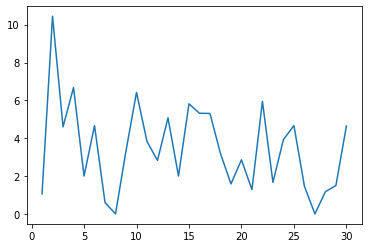

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.groupby('day').people.mean())

In [ ]:
Counter(df[df.maсhine == 1].hour)

Counter({0: 1,
         1: 1,
         7: 5,
         9: 7,
         10: 3,
         11: 2,
         12: 7,
         13: 4,
         15: 6,
         16: 2,
         17: 8,
         18: 6,
         19: 2,
         20: 6,
         21: 4,
         22: 1,
         23: 6})

In [ ]:
df[df.maсhine == 1].hour == 23

101    False
639    False
724    False
121    False
193    False
       ...  
730    False
715     True
80     False
623    False
308    False
Name: hour, Length: 71, dtype: bool

In [ ]:
sum(df[df.hour == 23].hockey) / len(df[df.hour == 23])

0.3111111111111111

In [ ]:
df[df.hour == 23].head()

,index,hockey,people,maсhine,date,month,day,hour,minute
213,201901282300.jpg,True,0,False,2019-01-28 23:00:00,1,28,23,0
225,201901282320.jpg,True,0,False,2019-01-28 23:20:00,1,28,23,20
528,201901292320.jpg,False,0,False,2019-01-29 23:20:00,1,29,23,20
89,201901302310.jpg,False,0,False,2019-01-30 23:10:00,1,30,23,10
517,201901302350.jpg,False,0,False,2019-01-30 23:50:00,1,30,23,50


In [ ]:
df[(df.hour == 6) & ((df.hockey) | (df.maсhine))]

,index,hockey,people,maсhine,date,month,day,hour,minute
470,201902010650.jpg,True,0,False,2019-02-01 06:50:00,2,1,6,50
576,201902110650.jpg,True,0,False,2019-02-11 06:50:00,2,11,6,50
198,201902150650.jpg,True,0,False,2019-02-15 06:50:00,2,15,6,50


In [ ]:
 df[(df.hour == 6)].head()

,index,hockey,people,maсhine,date,month,day,hour,minute
542,201901010600.jpg,False,0,False,2019-01-01 06:00:00,1,1,6,0
374,201901010630.jpg,False,0,False,2019-01-01 06:30:00,1,1,6,30
354,201901300620.jpg,False,0,False,2019-01-30 06:20:00,1,30,6,20
597,201901300640.jpg,False,0,False,2019-01-30 06:40:00,1,30,6,40
45,201902010630.jpg,False,0,False,2019-02-01 06:30:00,2,1,6,30


In [ ]:
df.hockey = df.hockey.astype(int)
df.maсhine = df.maсhine.astype(int)

In [ ]:
holidays.ds = holidays.ds.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

In [ ]:
holidays.ds

0      1999-01-01
1      1999-01-02
2      1999-01-03
3      1999-01-04
4      1999-01-06
          ...    
3273   2025-12-20
3274   2025-12-21
3275   2025-12-27
3276   2025-12-28
3277   2025-12-31
Name: ds, Length: 3278, dtype: datetime64[ns]

In [ ]:
df['dmy'] = df.date.apply(lambda x: datetime.datetime.strptime(x.strftime("%Y-%m-%d"), "%Y-%m-%d"))

In [ ]:
df['holiday'] = df.dmy.isin(holidays.ds).astype(int)

In [ ]:
df

,index,hockey,people,maсhine,date,month,day,hour,minute,dmy,holiday
542,201901010600.jpg,0,0,0,2019-01-01 06:00:00,1,1,6,0,2019-01-01,1
374,201901010630.jpg,0,0,0,2019-01-01 06:30:00,1,1,6,30,2019-01-01,1
119,201901010740.jpg,0,0,0,2019-01-01 07:40:00,1,1,7,40,2019-01-01,1
547,201901010810.jpg,0,0,0,2019-01-01 08:10:00,1,1,8,10,2019-01-01,1
259,201901010830.jpg,0,0,0,2019-01-01 08:30:00,1,1,8,30,2019-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
315,201902281830.jpg,1,0,0,2019-02-28 18:30:00,2,28,18,30,2019-02-28,0
292,201902282000.jpg,1,0,0,2019-02-28 20:00:00,2,28,20,0,2019-02-28,0
307,201902282300.jpg,1,0,0,2019-02-28 23:00:00,2,28,23,0,2019-02-28,0
97,201902282310.jpg,0,0,0,2019-02-28 23:10:00,2,28,23,10,2019-02-28,0


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier, CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

     |████████████████████████████████| 67.3MB 45kB/s 


# Предсказание для хоккеистов

In [ ]:
seed = 42

XTrain_hockey, XTest_hockey, YTrain_hockey, YTest_hockey = train_test_split(df[['month', 'day', 'hour', 'minute', 'holiday']], df.hockey, test_size = 0.25, random_state = seed, shuffle = False)

In [ ]:
XTrain_hockey

,month,day,hour,minute,holiday
542,1,1,6,0,1
374,1,1,6,30,1
119,1,1,7,40,1
547,1,1,8,10,1
259,1,1,8,30,1
...,...,...,...,...,...
663,2,20,11,20,0
457,2,20,11,30,0
205,2,20,12,40,0
162,2,20,14,40,0


In [ ]:
model_catboost_hockey = CatBoostClassifier(random_state = seed,
                           iterations = 50, 
                           max_depth = 5,
                           loss_function = 'CrossEntropy')

In [ ]:
model_catboost_hockey.fit(XTrain_hockey, YTrain_hockey, silent = True)

In [ ]:
roc_auc_score(YTest_hockey, model_catboost_hockey.predict_proba(XTest_hockey).T[1])

0.7023038605230386

In [ ]:
model_catboost_hockey.feature_importances_

array([ 4.6800099 , 10.26301276, 70.4929194 ,  6.93066549,  7.63339245])

# Предсказание машинки

In [ ]:
seed = 42

XTrain_maсhine, XTest_maсhine, YTrain_maсhine, YTest_maсhine = train_test_split(df[['month', 'day', 'hour', 'minute', 'holiday']], df.maсhine, test_size = 0.25, random_state = seed, shuffle = False)

In [ ]:
(df.maсhine == 1).sum()

71

In [ ]:
model_catboost_mаchine = CatBoostClassifier(random_state = seed,
                           iterations = 50, 
                           max_depth = 4,
                           loss_function = 'CrossEntropy')

In [ ]:
model_catboost_mаchine.fit(XTrain_maсhine, YTrain_maсhine, silent = True)

In [ ]:
roc_auc_score(YTest_maсhine, model_catboost_mаchine.predict_proba(XTest_maсhine).T[1])

0.6464646464646464

# Предсказание людей

In [ ]:
XTrain_people, XTest_people, YTrain_people, YTest_people = train_test_split(df[['month', 'day', 'hour', 'minute', 'holiday']], df.people.astype(int), test_size = 0.33, random_state = seed, shuffle = False)

In [ ]:
model_catboost_people = CatBoostRegressor(random_state = seed,
                          iterations = 50,
                          max_depth = 4,
                          grow_policy="Depthwise",
                          loss_function ='MAE')

In [ ]:
model_catboost_people.fit(XTrain_people, YTrain_people, silent = True)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_squared_error(np.floor(model_catboost_people.predict(XTest_people)), YTest_people)

39.78099173553719

In [ ]:
mean_absolute_error(np.floor(model_catboost_people.predict(XTest_people)), YTest_people)

2.690082644628099

# Сохранение 

In [ ]:
model_catboost_hockey.save_model("model_hockey.pkl")
model_catboost_mаchine.save_model("model_machine.pkl")
model_catboost_people.save_model("model_people.pkl")

# Загрузка

In [ ]:
model_path = "" # model_hockey, model_machine, model_people

model = CatBoostRegressor().load_model(model_path)